In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

In [12]:
df= pd.read_csv("data_sclaing.csv", low_memory=False)# charger mes donnée traitée dans la tache 3

In [13]:
df.describe()

,Unnamed: 0,x1,x2
count,1025.000000,1025.000000,1025.000000
mean,512.000000,19.510992,30.509924
std,296.036315,3.645604,3.696113
min,0.000000,-3.847150,24.433928
25%,256.000000,18.518495,28.659501
50%,512.000000,19.837920,30.058752
75%,768.000000,21.337207,31.475051
max,1024.000000,26.433766,55.875182


# definir la fonction pour trouver les outliers 

In [19]:
def score(df):
    global outliers,zscore
    outliers = []
    zscore = []
    threshold = 3
    mean = np.mean(df)
    std = np.std(df)
    for i in df:
        z_score= (i - mean)/std 
        zscore.append(z_score)
        if np.abs(z_score) > threshold:
            outliers.append(i)
    return print("Total number of outliers are",len(outliers))

In [20]:
score(df.x1)

Total number of outliers are 25


C:\Users\alimo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


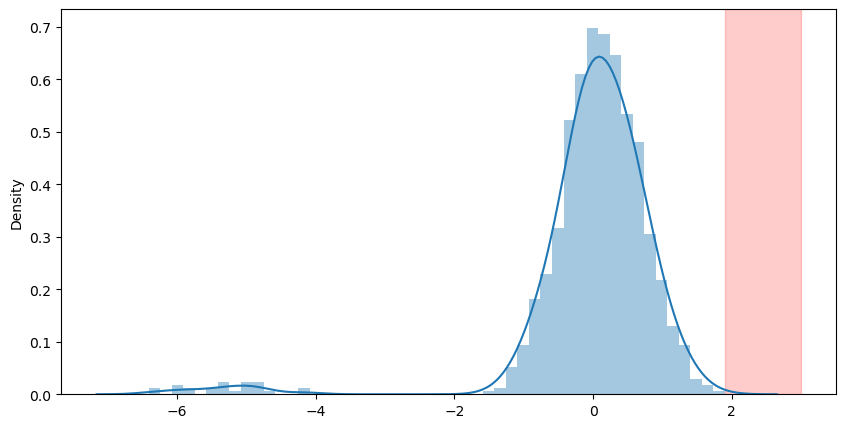

In [22]:
plt.figure(figsize = (10,5))
sns.distplot(zscore)
plt.axvspan(xmin = 3 ,xmax= max(zscore),alpha=0.2, color='red')

les outliers   se trouvent dans la zone rouge 


recuperer dans un nouveau dataset les valeurs inferieures à 3 

In [27]:
df1 = df[(df['x1'] < 3) | (df['x1'] > -3)] 

In [29]:
df1

,Unnamed: 0,x1,x2
0,0,21.028132,34.690901
1,1,15.680924,30.303195
2,2,20.374814,29.821848
3,3,19.219466,34.363051
4,4,18.893579,29.421644
...,...,...,...
1020,1020,1.814180,50.499760
1021,1021,1.646904,49.512863
1022,1022,-1.436186,48.974304
1023,1023,-3.381932,42.051224
